In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# matplotlib 한글 
import platform
if platform.system() == 'Darwin' : 
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

In [22]:
df = pd.read_csv('../data/경기도/전처리 후/회귀df인당.csv')

In [23]:
df

,기준년월,시군명,총인구수,신규가입자수,월별충전액,월별사용액,인센티브,월지급한도,가맹점수,인당충전액
0,2023-12,가평군,62302,484.0,4051,2140,0.1,60000,3354,65021.989663
1,2023-11,가평군,62131,458.0,2368,2187,0.1,60000,3354,38113.019266
2,2023-10,가평군,62125,555.0,2596,2335,0.1,60000,3354,41786.720322
3,2023-09,가평군,61976,782.0,3113,2376,0.1,60000,3354,50229.120950
4,2023-08,가평군,61773,473.0,3631,2392,0.1,600000,3354,58779.725770
...,...,...,...,...,...,...,...,...,...,...
333,2023-05,화성시,928550,6717.0,35058,37413,0.1,30000,27663,37755.640515
334,2023-04,화성시,925186,8440.0,35557,35525,0.1,30000,27663,38432.271997
335,2023-03,화성시,922231,9111.0,35906,36982,0.1,30000,27663,38933.846292
336,2023-02,화성시,918865,7829.0,30162,33325,0.1,30000,27663,32825.279013


c:\Users\Jws\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Jws\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


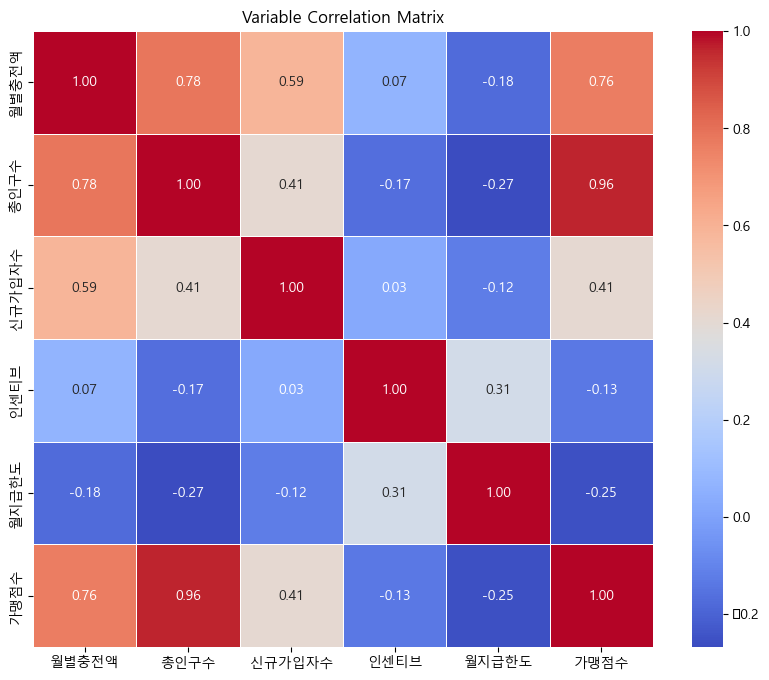

In [17]:
# 상관관계 매트릭스 생성
correlation_matrix = df[[ '월별충전액','총인구수', '신규가입자수', '인센티브', '월지급한도', '가맹점수']].corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Variable Correlation Matrix')
plt.show()

In [25]:
# 독립변수와 종속변수 설정
X = df[['총인구수', '신규가입자수', '인센티브', '월지급한도', '가맹점수']]
y = df['월별충전액']

# 데이터를 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(27696887.67485171, 0.7245572212487557)

c:\Users\Jws\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Jws\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


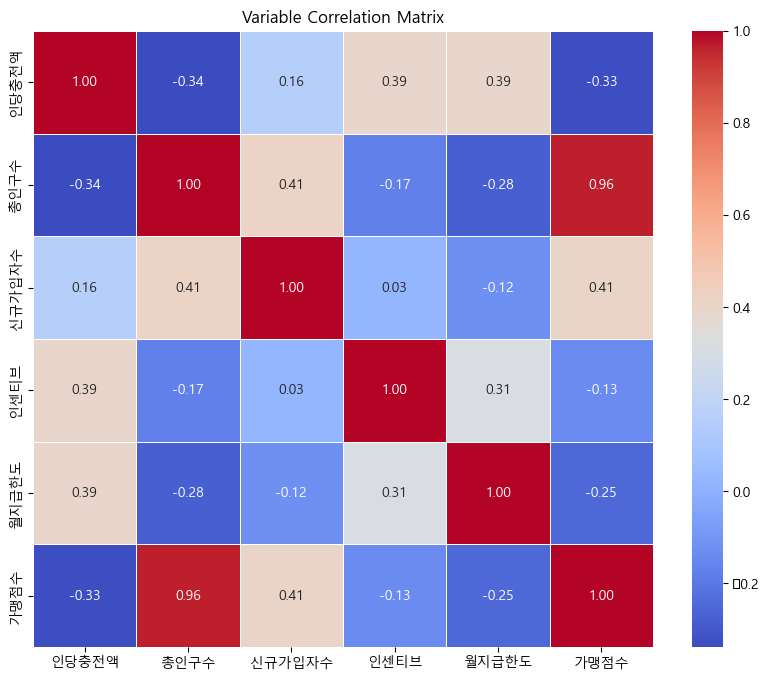

In [24]:
# 상관관계 매트릭스 생성
correlation_matrix = df[['인당충전액','총인구수', '신규가입자수', '인센티브', '월지급한도', '가맹점수']].corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Variable Correlation Matrix')
plt.show()

#### 상관관계 해석
인당충전액과 인센티브 ,인당충전액과 월지급한도의 상관계수는 0.39로 서로 관계없음을 나타낸다. 


#### 태블로 
구리시는 인센티브를 0.1로 하였을 때, 충전금액이 오른 것을 확인할 수 있음.
인센티브 증가 효과가 나타난 지역 : 구리시, 부천시, 용인시, 성남시
나머지 지역에서는 확실한 인센티브 증가 효과를 보이지 못함.

인센티브 감소 효과가 나타난 지역 : 구리시, 군포시, 부천시, 양평군, 여주시, 연천군, 용인시

오히려 반대로 나타난 지역 : 평택시

인센티브를 증가시켰을 때보다 감소시켰을 때 효과가 더 잘나타난다.
그러나 감소효과 또한 확연하게 드러나는 것은 아니다. 
이 데이터에 담기지 못한 변수가 큰 영향을 끼친 것으로 생각된다. (인센티브 이벤트)
또한 데이터의 


구리시는 인센티브와 지급한도를 동시에 올렸을 때 유의미한 충전액 증가를 보였다. 
군포시 23년 2,3월에 월지급한도 6,000원으로 했다가 충전액 꼬라박음.
성남시 인센티브와 지급한도 동시에 올려 유의미한 충전액 증가를 보임.
용인시도 인센티브와 지급한도 동시에 올려 유의미한 충전액 증가보임. 

대부분의 큰 증가폭을 보일 때는 인센티브와 지급한도를 동시에 올렸을 때 나타났다.
별다른 변화가 없음에도 큰 증가폭을 보인 곳은 외부변수에 영향을 받은 것으로 생각된다. 



파주 3월에 튄 이유. 난방비 파주페이 지원?